# Projektni zadatak - Upravljanje znanjem
Odjel za informatiku, Sveučilište u Rijeci  
Akademska godina 2021/2022

*Odabrani portal*: https://hr.n1info.com/  
*Autor*: Andrea Hrelja  
*Nositelji kolegija*:
- izv. prof. dr. sc. Ana Meštrović
- dr. sc. Slobodan Beliga

Dokumentacija prikupljanja podataka dostupna je u korijenu ovog repozitorija u datoteci [README.md](https://github.com/andhrelja/UZ-projekt/blob/master/README.md).
U nastavku je implementiran i dokumentiran proces Analize podataka.

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import os

ARTICLES_CLEAN_PATH = 'C:\\Users\\AndreaHrelja\\Documents\\Faks\\5. godina\\3. semestar\\UPZ\\Scrapeinar\\scrape\\n1info\\csv\\clean-n1info.csv'
MONTH_WORDCOUNT_PATH = 'C:\\Users\\AndreaHrelja\\Documents\\Faks\\5. godina\\3. semestar\\UPZ\\Scrapeinar\\scrape\\n1info\\csv\\wordcount-n1info.csv'

df = pd.read_csv(ARTICLES_CLEAN_PATH, encoding='utf-8')
df['tags'] = df['tags'].map(eval)
df['categories'] = df['categories'].map(eval)

df = df[[
    'id', 'datetime', 'date', 'month', 'category_name',
    'title', 'author', 'text', 'categories', 'tags',
    'covid_related', 'vaccine_related', 'anti_related', 'soj_related'
]]

rename_map = {
    'covid_related': "Objave vezane uz korona tematiku", 
    'vaccine_related': "Objave vezane uz tematiku cijepljenja", 
    'anti_related': "Objave vezane uz tematiku antimaskera/antivaksera", 
    'soj_related': "Objave vezane uz tematiku sojeva",
    'total': "Ukupno objava"
}

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50616 entries, 0 to 50615
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               50616 non-null  int64 
 1   datetime         50616 non-null  object
 2   date             50616 non-null  object
 3   month            50616 non-null  object
 4   category_name    50616 non-null  object
 5   title            50616 non-null  object
 6   author           50611 non-null  object
 7   text             50603 non-null  object
 8   categories       50616 non-null  object
 9   tags             50616 non-null  object
 10  covid_related    50189 non-null  object
 11  vaccine_related  50106 non-null  object
 12  anti_related     50027 non-null  object
 13  soj_related      50032 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.4+ MB


U sklopu analize koriste se dvije CSV datoteke:
- clean-n1info.csv
- wordcount-n1info.csv

### clean-n1info.csv

| Naziv kolumne   | Tip podatka   | Opis podatka                                               |
|-----------------|---------------|------------------------------------------------------------|
| id              | int           | Jedinstveni identifikator članka                           |
| datetime        | datetime      | Datum i vrijeme (YYYY-MM-DD HH:MM:SS) članka               |
| date            | date          | Datum (YYYY-MM-DD) članka                                  |
| month           | date          | Datum (YYYY-MM-01) članka                                  |
| category_name   | string        | Naziv kategorije glavne članka                             |
| title           | string        | Naslov članka                                              |
| author          | string        | Autor članka                                               |
| text            | string        | Tekst članka                                               |
| categories      | string (list) | Kategorije članka (Python lista u obliku tekstualnog niza) |
| tags            | string (list) | Tagovi članka (Python lista u obliku tekstualnog niza)     |
| covid_related   | boolean       | Članak je vezan uz COVID tematiku                          |
| vaccine_related | boolean       | Članak je vezan uz tematiku cijepljenja                    |
| anti_related    | boolean       | Članak je vezan uz tematiku antimaskera/antivaksera        |
| soj_related     | boolean       | Članak je vezan uz tematiku novih sojeva                   |

### wordcount-n1info.csv

| Naziv kolumne   | Tip podatka   | Opis podatka                                               |
|-----------------|---------------|------------------------------------------------------------|
| month           | date          | Datum (YYYY-MM-01) članka                                  |
| title           | string        | Konkatenacija naslova i teksta članka                      |


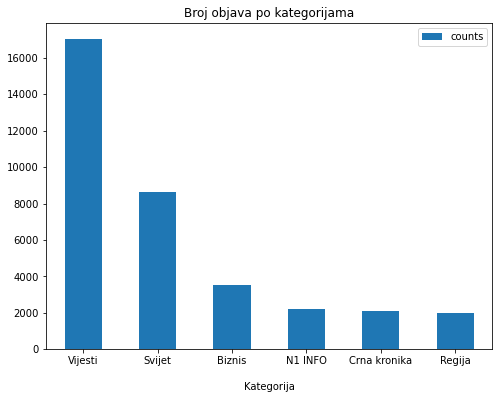

In [2]:
fig, ax = plt.subplots(1, figsize=(8, 6))

category_df = df.groupby('category_name').size() \
    .reset_index(name='counts') \
    .sort_values('counts', ascending=False) \
    .head(6)

most_common_categories = category_df['category_name'].unique()
category_df.plot(x='category_name', kind='bar', rot=0, ax=ax)

ax.set_title('Broj objava po kategorijama')
ax.set_xlabel('\nKategorija')

plt.show()

a) Ukupan broj objava na portalu za vremenski period 1.1.2021. - 31.12.2021.: 50,616
b) Broj vijesti vezanih za korona tematiku: 17,036
c) Broj vijesti vezanih za cijepljenje: 9,048
d) Broj vijesti vezanih za antimaskere/antivaksere: 321
*) Broj vijesti vezanih za nove sojeve: 853


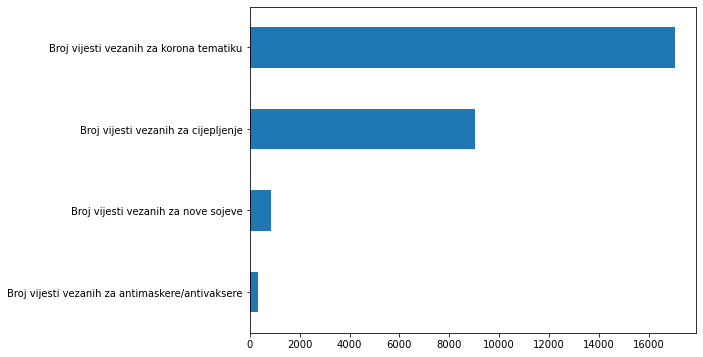

In [3]:
num_anti_related    = len(df[df['anti_related'] == True])
num_soj_related     = len(df[df['soj_related'] == True])
num_vaccine_related = len(df[df['vaccine_related'] == True])
num_covid_related   = len(df[df['covid_related'] == True])

print('a) Ukupan broj objava na portalu za vremenski period 1.1.2021. - 31.12.2021.: {:,.0f}'.format(len(df)))
print('b) Broj vijesti vezanih za korona tematiku: {:,.0f}'.format(num_covid_related))
print('c) Broj vijesti vezanih za cijepljenje: {:,.0f}'.format(num_vaccine_related))
print('d) Broj vijesti vezanih za antimaskere/antivaksere: {:,.0f}'.format(num_anti_related))
print('*) Broj vijesti vezanih za nove sojeve: {:,.0f}'.format(num_soj_related))

pd.DataFrame(
    {
        'count': [
            num_anti_related,
            num_soj_related,
            num_vaccine_related,
            num_covid_related,
        ]
    }, index=[
        'Broj vijesti vezanih za antimaskere/antivaksere',
        'Broj vijesti vezanih za nove sojeve',
        'Broj vijesti vezanih za cijepljenje',
        'Broj vijesti vezanih za korona tematiku'
    ]
).plot.barh(legend=None, figsize=(8, 6))

plt.show()

In [4]:
day_df = df[['date', 'covid_related', 'anti_related', 'vaccine_related']].groupby('date').sum()
day_df['total'] = df.groupby('date').size()
day_df = day_df[['total', 'covid_related', 'vaccine_related', 'anti_related']]
day_df.rename(rename_map, axis=1)

Ukupno objava  Objave vezane uz korona tematiku  \
date                                                          
2021-01-01             31                                11   
2021-01-02             72                                28   
2021-01-03             74                                27   
2021-01-04            140                                49   
2021-01-05            134                                51   
...                   ...                               ...   
2021-12-27             64                                26   
2021-12-28            101                                30   
2021-12-29            133                                38   
2021-12-30            149                                52   
2021-12-31             85                                29   

            Objave vezane uz tematiku cijepljenja  \
date                                                
2021-01-01                                      3   
2021-01-02                                     12   
2021-01-03                                      9   
2021-01-04                                     16   
2021-01-05                                     30   
...                                           ...   
2021-12-27                                     18   
2021-12-28                                     19   
2021-12-29                                     22   
2021-12-30                                     26   
2021-12-31                                     12   

            Objave vezane uz tematiku antimaskera/antivaksera  
date                                                           
2021-01-01                                                  0  
2021-01-02                                                  0  
2021-01-03                                                  0  
2021-01-04                                                  0  
2021-01-05                                                  0  
...                                                       ...  
2021-12-27                                                  1  
2021-12-28                                                  1  
2021-12-29                                                  5  
2021-12-30                                                  5  
2021-12-31                                                  1  

[360 rows x 4 columns]

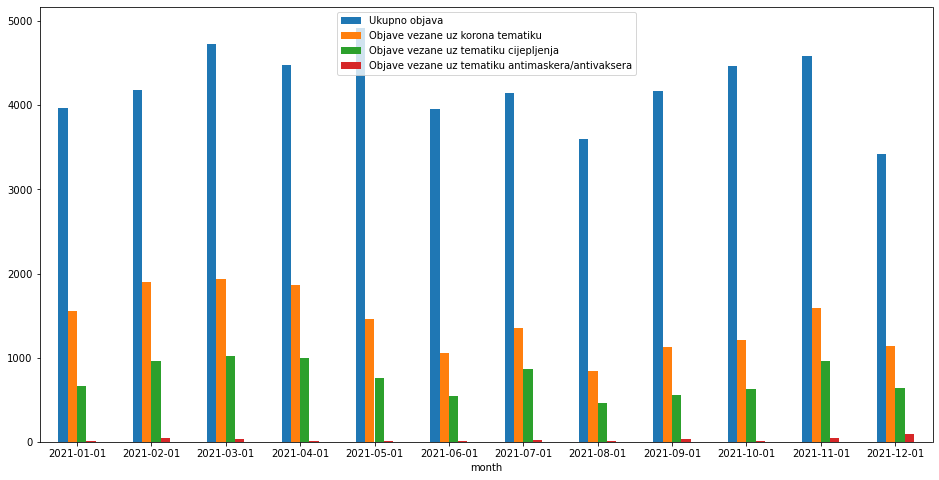

In [22]:
month_df = df[['month', 'covid_related', 'anti_related', 'vaccine_related']].groupby('month').sum()
month_df['total'] = df.groupby('month').size()
month_df = month_df[['total', 'covid_related', 'vaccine_related', 'anti_related']].rename(rename_map, axis=1)
month_df.plot(kind='bar', rot=0, figsize=(16, 8))
plt.show()

In [19]:
month_df.rename(rename_map, axis=1)

Ukupno objava  Objave vezane uz korona tematiku  \
month                                                         
2021-01-01           3965                              1557   
2021-02-01           4186                              1905   
2021-03-01           4730                              1934   
2021-04-01           4479                              1868   
2021-05-01           4922                              1456   
2021-06-01           3954                              1059   
2021-07-01           4150                              1356   
2021-08-01           3596                               840   
2021-09-01           4170                              1121   
2021-10-01           4469                              1210   
2021-11-01           4580                              1587   
2021-12-01           3415                              1143   

            Objave vezane uz tematiku cijepljenja  \
month                                               
2021-01-01                                    665   
2021-02-01                                    959   
2021-03-01                                   1014   
2021-04-01                                    997   
2021-05-01                                    763   
2021-06-01                                    548   
2021-07-01                                    860   
2021-08-01                                    462   
2021-09-01                                    558   
2021-10-01                                    623   
2021-11-01                                    965   
2021-12-01                                    634   

            Objave vezane uz tematiku antimaskera/antivaksera  
month                                                          
2021-01-01                                                  6  
2021-02-01                                                 43  
2021-03-01                                                 28  
2021-04-01                                                 13  
2021-05-01                                                  9  
2021-06-01                                                  6  
2021-07-01                                                 21  
2021-08-01                                                 15  
2021-09-01                                                 30  
2021-10-01                                                 14  
2021-11-01                                                 46  
2021-12-01                                                 90

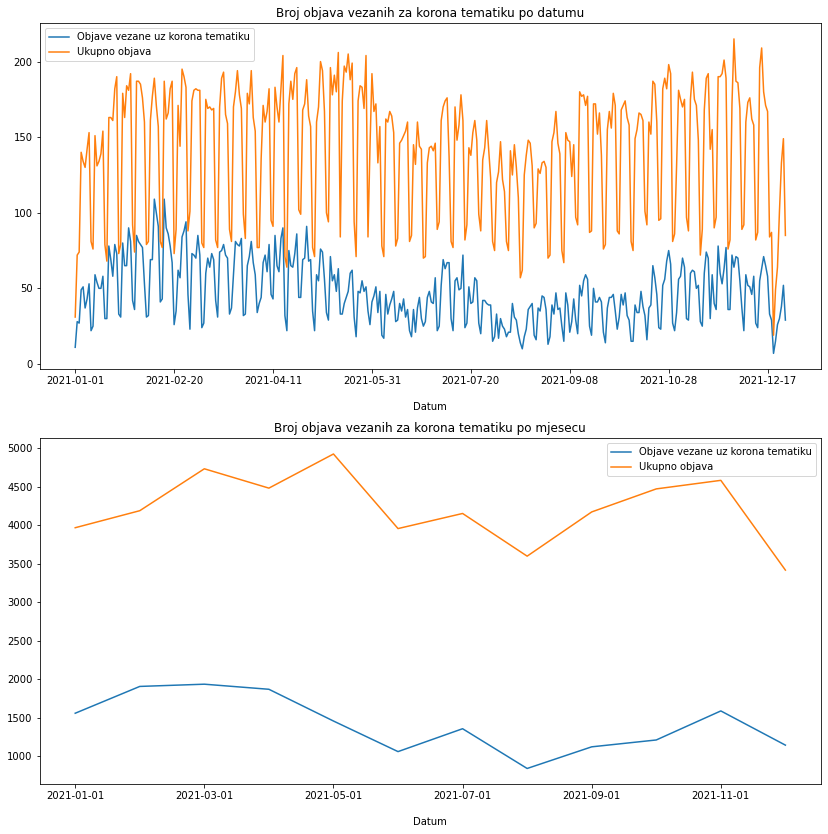

In [6]:
fig, ax = plt.subplots(nrows=2, figsize=(14, 14))

df[df['covid_related'] == True].groupby('date').size() \
    .reset_index(name='counts') \
    .sort_values('date') \
    .set_index('date') \
    .plot(ax=ax[0], legend=None)

df.groupby('date').size() \
    .reset_index(name='counts') \
    .sort_values('date') \
    .set_index('date') \
    .plot(ax=ax[0], legend=None)


df[df['covid_related'] == True].groupby('month').size() \
    .reset_index(name='counts') \
    .sort_values('month') \
    .set_index('month') \
    .plot(ax=ax[1], legend=None)

df.groupby('month').size() \
    .reset_index(name='counts') \
    .sort_values('month') \
    .set_index('month') \
    .plot(ax=ax[1], legend=None)

ax[0].set_title('Broj objava vezanih za korona tematiku po datumu')
ax[0].set_xlabel('\nDatum')
ax[0].legend([rename_map[name] for name in ['covid_related', 'total']])
ax[1].set_title('Broj objava vezanih za korona tematiku po mjesecu')
ax[1].set_xlabel('\nDatum')
ax[1].legend([rename_map[name] for name in ['covid_related', 'total']])

plt.show()

Slijedeći grafikon (Word Cloud) prikazuje ukupnu frekvenciju pojavljivanja tagova u člancima za period od 1.1.2021 - 31.12.2021.

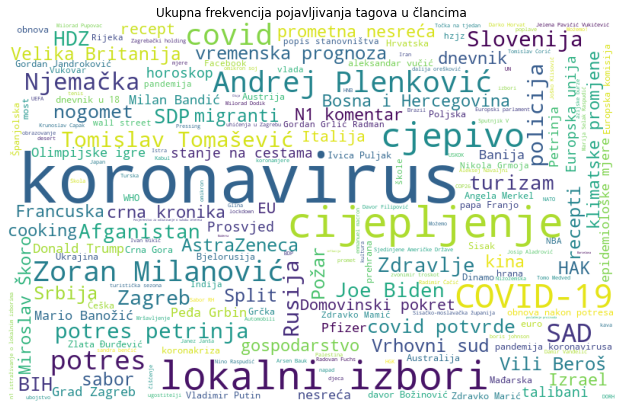

In [7]:
cattags_df = df[['date', 'month', 'category_name', 'tags']].dropna() \
    .explode('tags') \
    .reset_index(drop=True) \
    .set_index('category_name')

tag_frequency = cattags_df.groupby('tags').size() \
    .reset_index(name='counts') \
    .sort_values('counts', ascending=False) \
    .set_index('tags')

fig, ax = plt.subplots(figsize=(14, 7))
wordcloud = WordCloud(width=800, height=500, background_color='white').generate_from_frequencies(tag_frequency.to_dict()['counts'])
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Ukupna frekvencija pojavljivanja tagova u člancima')
plt.show()

Slijedeći grafikon (Word Cloud) prikazuje frekvenciju pojavljivanja tagova u člancima po pojedinoj kategoriji za period od 1.1.2021 - 31.12.2021.

Frekvencija pojavljivanja tagova za pojedinu kategoriju


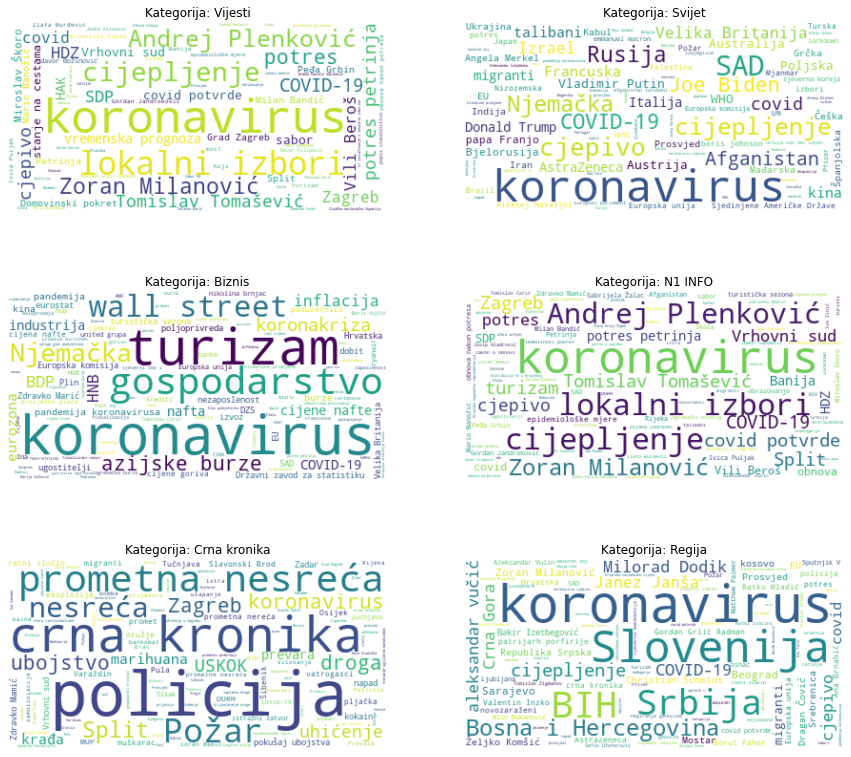

In [8]:
counts_df = cattags_df.groupby(['category_name', 'tags']).size() \
    .reset_index(name='counts') \
    .sort_values('counts', ascending=False) \
    .set_index('category_name')

print("Frekvencija pojavljivanja tagova za pojedinu kategoriju")
ncols = 2
nrows = len(most_common_categories) / ncols
fig, axs = plt.subplots(nrows=int(nrows), ncols=ncols, figsize=(nrows*5, ncols*7))
for i, category_name in enumerate(most_common_categories):
    frequencies = {
        item['tags']: item['counts'] 
        for item in counts_df.loc[category_name].to_dict(orient='records')
    }
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(frequencies)
    
    axs[i // 2, i % 2].set_title("Kategorija: " + category_name)
    axs[i // 2, i % 2].imshow(wordcloud, interpolation='bilinear')
    axs[i // 2, i % 2].axis('off')

Slijedeći grafikon (Word Cloud) prikazuje frekvenciju pojavljivanja top 25 tagova u člancima po mjesecu za period od 1.1.2021 - 31.12.2021. S desne je strane "bar" graf koji prikazuje frekvenciju pojavljivanja top 10 tagova u člancima po mjesecu.

Frekvencija pojavljivanja tagova po mjesecu


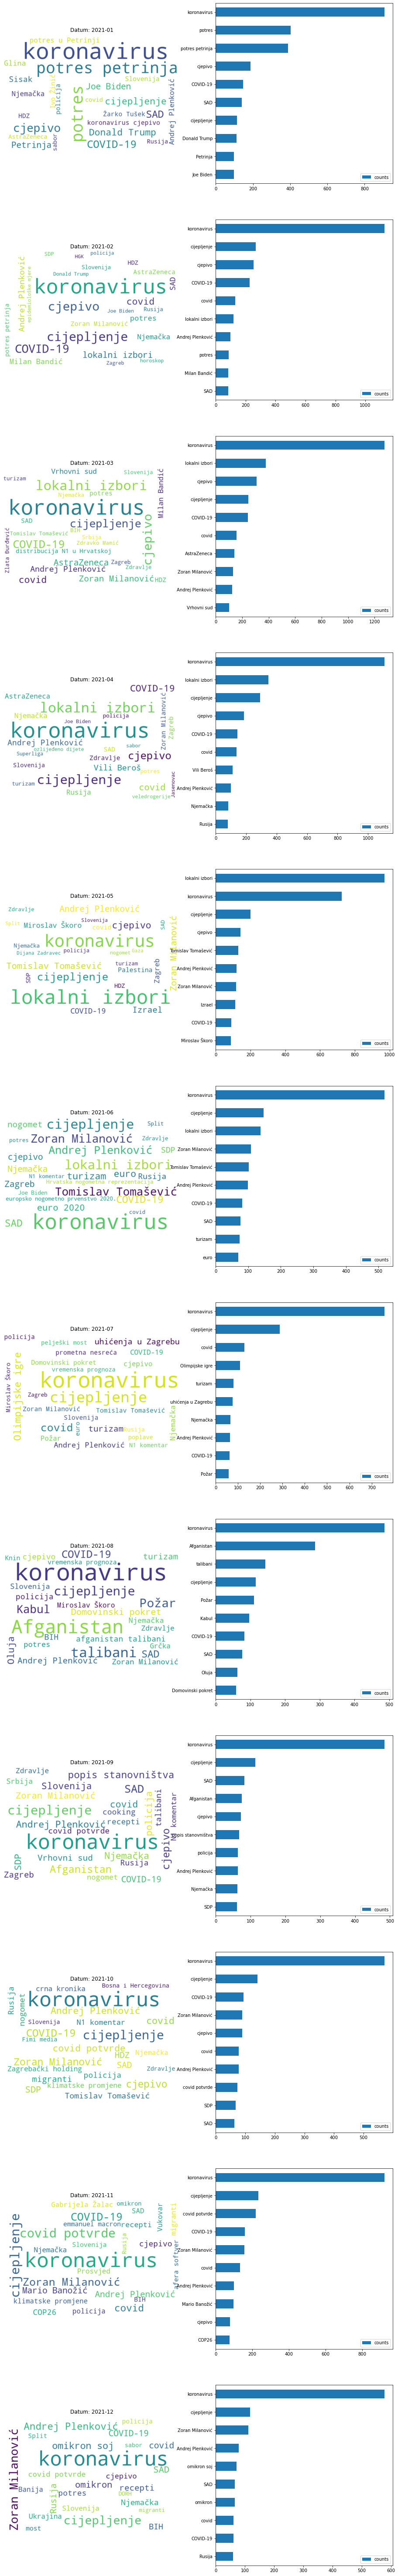

In [9]:
monthtags_df = cattags_df.groupby(['month', 'tags']).size() \
    .reset_index(name='counts') \
    .sort_values('counts', ascending=False) \
    .set_index('month')

print("Frekvencija pojavljivanja tagova po mjesecu")
ncols = 2
nrows = len(monthtags_df.index.unique())
fig, axs = plt.subplots(nrows=int(nrows), ncols=ncols, figsize=(ncols*8, nrows*9))
for i, month in enumerate(sorted(monthtags_df.index.unique())):
    month_items = monthtags_df.loc[month]
    frequencies = {
        item['tags']: item['counts']
        for item in month_items.to_dict(orient='records')[:25]
    }
    wordcloud = WordCloud(background_color='white', height=400, width=600).generate_from_frequencies(frequencies)
    
    axs[i, 0].set_title("Datum: " + str(month)[:7])
    axs[i, 0].imshow(wordcloud, interpolation='bilinear')
    axs[i, 0].axis('off')
    
    month_items.head(10).sort_values('counts').plot.barh(x='tags', ax=axs[i, 1])
    axs[i, 1].set_ylabel(None)

Primjećuje se da je u svakom mjesecu tag "koronavirus" najčešći, osim u svibnju (2021-05) kada je tag "lokalni izbori" najzastupljenija vijest.

U nastavku slijedi tablični prikaz unigrama za top 25 tagova u člancima po mjesecu za period od 1.1.2021 - 31.12.2021.

In [10]:
for i, month in enumerate(sorted(monthtags_df.index.unique())):
    print("Ispis unigrama za {}".format(str(month)[:7]))
    print(monthtags_df.loc[month][:25].reset_index(drop=True))
    print()

Ispis unigrama za 2021-01
                   tags  counts
0           koronavirus     906
1                potres     403
2       potres petrinja     388
3               cjepivo     187
4              COVID-19     147
5                   SAD     141
6           cijepljenje     115
7          Donald Trump     113
8             Joe Biden      97
9              Petrinja      97
10                Sisak      75
11                Glina      67
12     Andrej Plenković      64
13             Njemačka      59
14    potres u Petrinji      58
15            Ivo Žinić      52
16            Slovenija      52
17          Žarko Tušek      47
18                  HDZ      45
19  koronavirus cjepivo      43
20             policija      43
21          AstraZeneca      38
22               Rusija      37
23                covid      37
24                sabor      36

Ispis unigrama za 2021-02
                   tags  counts
0           koronavirus    1127
1           cijepljenje     267
2               cje

Slijedeći blok definira dijakritičke znakove, znakove koji će se izbrisati iz ukupnog zbira tekstova i naslova članaka (`replace_chars`) te zaustavne riječi koje su odabrane ručnim pregledom unigrama iz ukupnog zbira tekstova i naslova članaka.

In [11]:
diacritics = {
    'č': 'c',
    'ć': 'c',
    'š': 's',
    'ž': 'z'
}
replace_chars = [
    '”','\t','\n','!','#','$','%','&','/','(',')','[',']','{','}','=',
    '?','*','\\','|','€','÷','×',',','.','_','@',':','"',';',':','\xa0'
]
stop_words = [
    'protiv', 'hrvatskoj', 'ljudi', 'dana', 'novi', 'novih', 'posto', 'komentar', 'nove', 'evo', 'traži', 'biste', 'broj',
    'je','u','i','da','se','na','za','su','od','s','će','a','koji','o','to','ne','što','kako','bi','putem','te','iz','do',
    'nije','koje','biti','rekao','kao','ali','ili','koja','zbog','sve','smo','može','–','po','jer','sa','još','ako','bilo',
    'li','oko','ima','prema','bio','sam','dok','kada','mogu','pa','prije','već','nego','nisu','kod','uz','treba','ih','mi',
    'osoba','sada','tako','bez','tri','no','ga','neće','kaže','nema','rekla','toga','dva','ćemo','bila','danas','jedan',
    'gdje','kojima','kazao','kad','između','tome','godina','oni','ni','imaju','ove','tijekom','među','taj','tu','on',
    'nekoliko','koju','radi','dvije','pitanje','svoje','vrijeme','svi','dio','im','dalje','bih','nešto','osobe','prvi',
    'je','jedna','bili','također','njih','mu','odnosno','vrlo','ovo','uvijek','način','četiri','n1','tom','dodao','mora',
    'kojoj','druge','imamo','onda','24','koliko','ponedjeljak','ja','nas','kojem','godine','neki','poput','pet','smatra',
    'odnosu','pod','navodi','dan','ono','neke','tko','preko','kroz','čak','kuna','drugi','piše','one','sata','utorak',
    'srijedu','ta','istaknuo','suda','svoj','ovaj','mislim','ona','malo','niti','tim','petak','jednom','ovom','četvrtak',
    'sad','kojih','bude','svim','pri','vam','bit','tek','šest','čega','mogao','možete','svojim','sati','svoju','znači',
    'mogli','tjedna','riječ','obzirom','osim','zato','zašto','ste','iako','tog','žele','čemu','time','stvari','naše',
    'njima','toj','tada','komentirao','kojeg','kazala','doći','tiče','mogla','tih','nad','isto','imao','drugom','jednu',
    'svom','bismo','se','ipak','bile','ova','n','samo','nam','imati','moći', 'nakon','više','dosad','milijuna'
]
stop_words_no_diacritics = []
for stop_word in stop_words:
    if any(key in stop_word for key in diacritics.keys()):
        for key, value in diacritics.items():
            stop_word = stop_word.replace(key, value)
        stop_words_no_diacritics.append(stop_word)

def get_word_count(text):
    word_count = {}
    for char in replace_chars:
        text = text.replace(char, ' ')
    all_text = text.lower().split(" ")
    for word in all_text:
        if word and not word.isnumeric() and word not in stop_words and word not in stop_words_no_diacritics:
            try:
                word_count[word] += 1
            except KeyError:
                word_count[word] = 1
    sorted_word_count = {k: v for k, v in sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:25]}
    return sorted_word_count

Slijedeći blok konkatenira sve naslove i tekstove na razini mjeseca u ukupan zbir naslova i tekstova članaka. Zbog dugog izvođenja agregacije, sadržaj je spremljen u wordcount-n1info.csv.

In [17]:
if not os.path.isfile(MONTH_WORDCOUNT_PATH):
    month_titletext_df = df[['month', 'title', 'text']].groupby('month').sum()
    month_titletext_df.to_csv(MONTH_WORDCOUNT_PATH, encoding='utf-8')
else:
    month_titletext_df = pd.read_csv(MONTH_WORDCOUNT_PATH, encoding='utf-8', index_col='month')

U nastavku slijedi Word Cloud prikaz top 25 najčešćih pojavljivanja riječi ukupnom zbiru naslova i tekstova članaka po mjesecu za period od 1.1.2021 - 31.12.2021. S desne je strane "bar" graf koji prikazuje frekvenciju pojavljivanja top 10 riječi u člancima po mjesecu.

Najčešće riječi po mjesecu


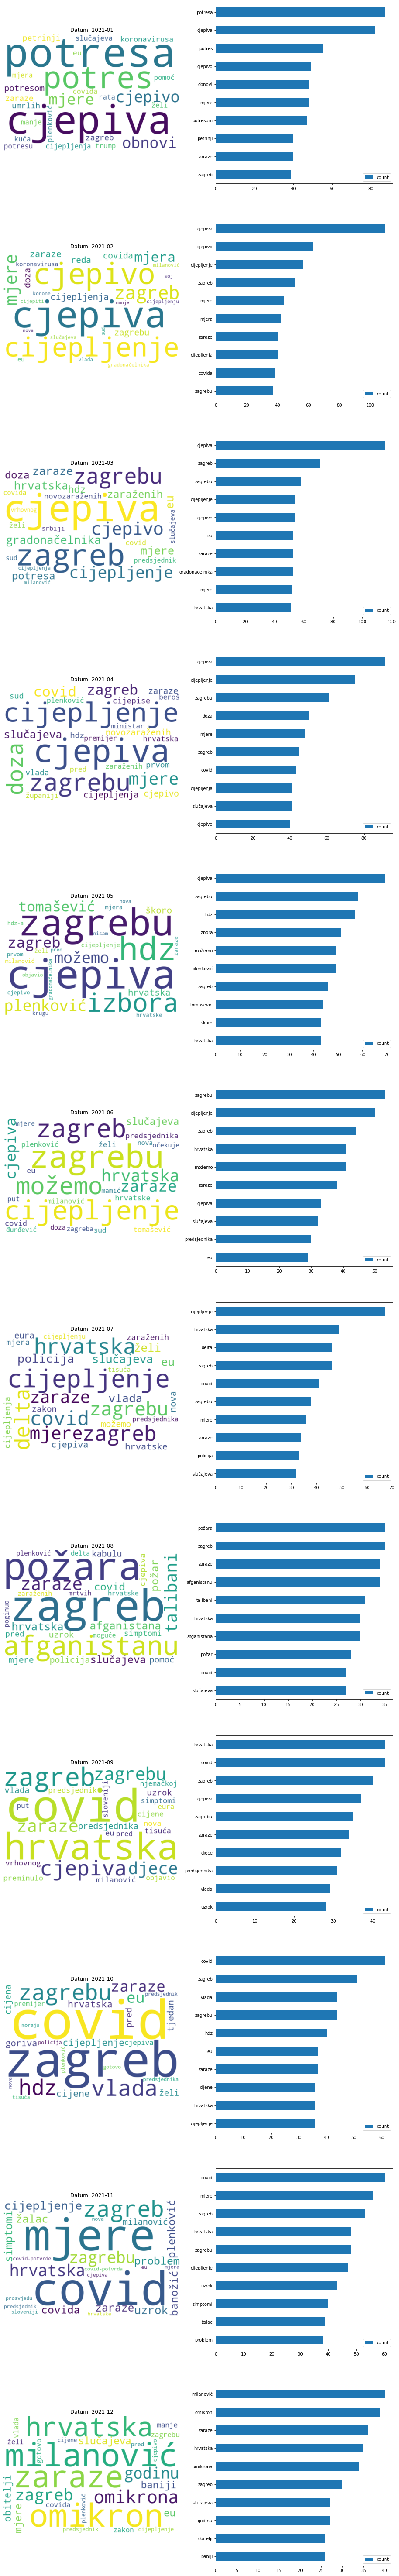

In [20]:
print("Najčešće riječi po mjesecu")
ncols = 2
nrows = len(month_titletext_df.index.unique())
fig, axs = plt.subplots(nrows=int(nrows), ncols=ncols, figsize=(ncols*8, nrows*9))
for i, month in enumerate(sorted(month_titletext_df.index.unique())):
    month_items = month_titletext_df.loc[month]
    frequencies = get_word_count(month_items['title'])
    wordcloud = WordCloud(background_color='white', height=400, width=600).generate_from_frequencies(frequencies)
    
    axs[i, 0].set_title("Datum: " + str(month)[:7])
    axs[i, 0].imshow(wordcloud, interpolation='bilinear')
    axs[i, 0].axis('off')
    
    pd.DataFrame(frequencies.values(), frequencies.keys(), columns=['count']) \
        .head(10) \
        .sort_values('count') \
        .plot.barh(ax=axs[i, 1])
    axs[i, 1].set_ylabel(None)

Slijedeći blok izračunava i prikazuje Jaccardov indeks sličnosti za svaka dva mjeseca u razdoblju od 1.1.2021 do 31.12.2021. Svaki mjesec na x-osi predstavlja Jaccardov indeks sličnosti između ispisanog i prethodnog mjeseca.

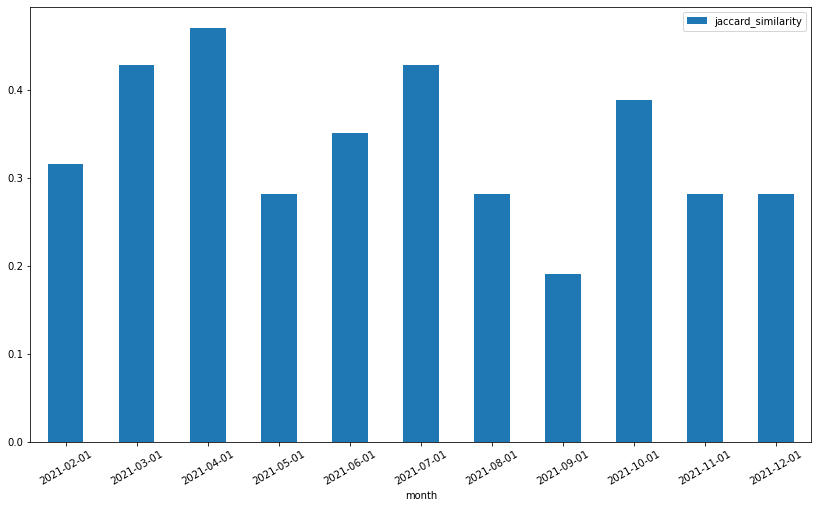

In [21]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

index = month_titletext_df.index[1:]
data = {'jaccard_similarity': []}
for i, month in enumerate(month_titletext_df.index):
    if i == 0:
        continue
    prev_month = month_titletext_df.index[i-1]
    curr_month = month_titletext_df.index[i]
    prev_month_text = month_titletext_df.loc[prev_month]['title']
    curr_month_text = month_titletext_df.loc[curr_month]['title']
    
    prev_word_count = get_word_count(prev_month_text)
    curr_word_count = get_word_count(curr_month_text)
    data['jaccard_similarity'].append(jaccard_similarity(prev_word_count.keys(), curr_word_count.keys()))

pd.DataFrame(data=data, index=index).plot(kind='bar', rot=30, figsize=(14, 8))
plt.show()
    